<h2>Dataset Description</h2>

This dataset contains information on 50 startups based in New York, California, and Florida. It focuses on the relationship between various financial factors and the profit generated by these startups. The features available in the dataset include:

1. <b>Research and Development Spending:</b> The amount of money spent by each startup on research and development activities.
2. <b>Administration Spending:</b> The expenditure of each startup on administrative functions.
3. <b>Marketing Spending:</b> The funds allocated by each startup towards marketing strategies.
4. <b>State:</b> The location of each startup, indicating whether it is based in New York, California, or Florida.
5. <b>Profit:</b> The financial profit achieved by each startup.

The objective of this dataset is to predict the profit of startups based on the available financial features.
By analyzing the relationship between these factors, we aim to gain insights into the effectiveness of different investment areas and understand how spending patterns impact profitability.

This dataset provides a valuable opportunity to explore and apply machine learning techniques in the context of startup profitability prediction.


<h2>Import Libraries</h2>

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

<h2>Import Dataset and Initial Overview</h2>

In [68]:
dataset_50 = pd.read_csv("50_Startups.csv.xls")
dataset_50.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
#get the column names of the dataset
dataset_50.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [8]:
#initial info of the dataset
dataset_50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [10]:
#check the shape of the dataset
dataset_50.shape

(50, 5)

In [12]:
#check for missing values
total=dataset_50.isnull().sum().sort_values(ascending=False)
percent=(dataset_50.isnull().sum()/dataset_50['Profit'].count()).sort_values(ascending=False)
missing_data=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
R&D Spend,0,0.0
Administration,0,0.0
Marketing Spend,0,0.0
State,0,0.0
Profit,0,0.0


In [19]:
#check for duplicated rows
dataset_50.duplicated().any()

False

In [20]:
#get a statistical description
dataset_50.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


1. R&D Spend:<br>
The average R&D spending across the startups is approximately \\$73,721.62.<br>
The standard deviation indicates a significant variation in R&D spending among the startups.<br>
The minimum spend is \\$0, suggesting that some startups may not allocate any funds to research and development.<br>
The majority of startups (25th to 75th percentile) spend between \\$39,936.37 and \\$101,602.80 on R&D.<br>
The maximum spend is \\$165,349.20, indicating that some startups heavily invest in research and development.<br>
<br>
2. Administration:<br>
The average administration spending is around \\$121,344.64.<br>
The standard deviation suggests moderate variation in administration expenditure.<br>
The minimum spend is \\$51,283.14, indicating that all startups allocate some funds to administrative functions.<br>
The majority of startups (25th to 75th percentile) spend between \\$103,730.88 and \\$144,842.18 on administration.<br>
The maximum spend is \\$182,645.56, signifying higher administrative expenses for some startups.<br>
<br>
3. Marketing Spend:<br>
The average marketing spending is approximately \\$211,025.10.<br>
The standard deviation reveals a wide range of marketing expenditures across the startups.<br>
Some startups do not allocate any funds to marketing (minimum value is \\$0), while others invest significantly.<br>
The majority of startups (25th to 75th percentile) spend between \\$129,300.13 and \\$299,469.08 on marketing.<br>
The maximum spend is \\$471,784.10, suggesting that certain startups heavily focus on marketing strategies.<br>
<br>
4. Profit:<br>
The average profit generated by the startups is approximately \\$112,012.64.<br>
The standard deviation indicates a moderate degree of variation in profitability among the startups.<br>
The minimum profit is \\$14,681.40, indicating that some startups may not be highly profitable.<br>
The majority of startups (25th to 75th percentile) achieve profits ranging from \\$90,138.90 to \\$139,765.98.<br>
The maximum profit is \\$192,261.83, signifying successful profitability for some startups.






<h2>Exploratory Data Analysis (EDA)</h2>

/Users/kulfi/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot:>

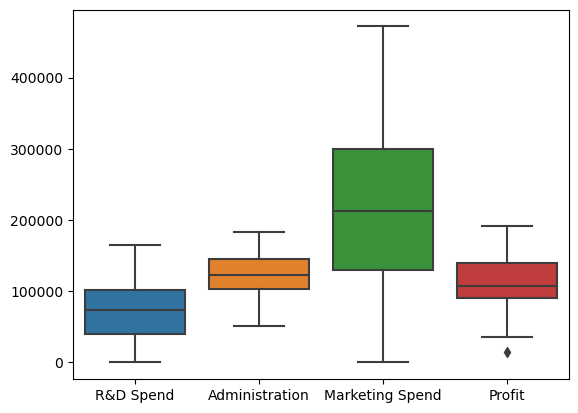

In [32]:
#checking for outliers
sns.boxplot(data=dataset_50)

#since there is minimal data (50 rows), the outlier can be left as it is.

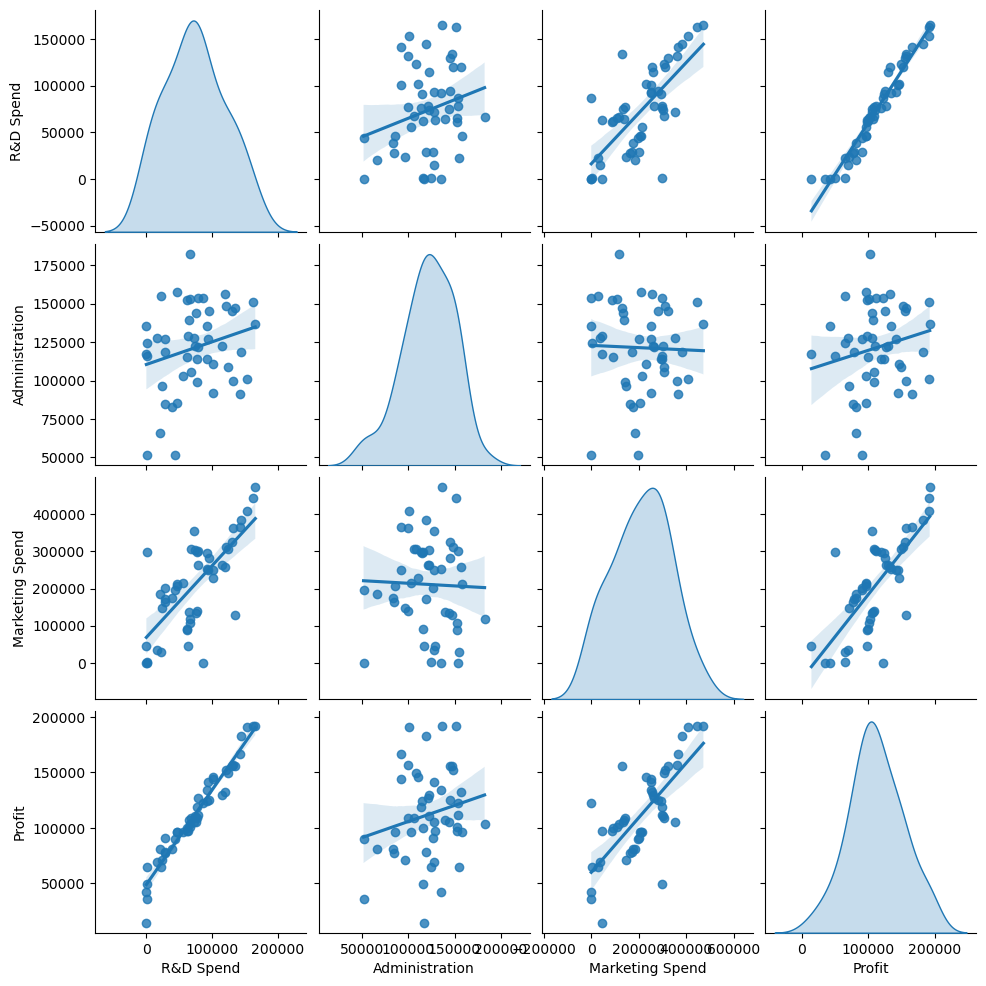

In [33]:
#correlation of dataset columns
sns.pairplot(dataset_50[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']], kind="reg", diag_kind="kde")
plt.show()

In [34]:
dataset_50.corr()

/var/folders/ql/v08s0m1x5l79l_p_r0rh42mw0000gn/T/ipykernel_24874/752952658.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset_50.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<h4>Insights</h4><br>
1. We can see normal distributions of numerical variables.<br>
2. R&D Spend and Profit: There is a strong positive correlation of approximately 0.97 between R&D Spend and Profit. This indicates that as the R&D spending increases, the profit tends to increase as well. R&D Spend appears to be a significant factor in predicting profitability.<br>
3. Administration and Profit: There is a relatively weak positive correlation of approximately 0.20 between Administration and Profit. This suggests a small positive relationship between administration spending and profit, but it is not as strong as the correlation with R&D Spend.<br>
4. Marketing Spend and Profit: There is a moderate positive correlation of approximately 0.75 between Marketing Spend and Profit. This implies that as the marketing spending increases, the profit tends to increase as well. Marketing Spend appears to have a notable impact on profitability.

/Users/kulfi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


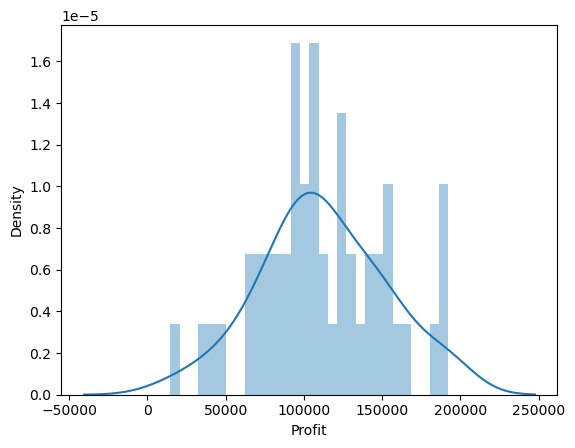

In [35]:
#distribution of profit
sns.distplot(dataset_50["Profit"], bins=30)
plt.show()

/Users/kulfi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


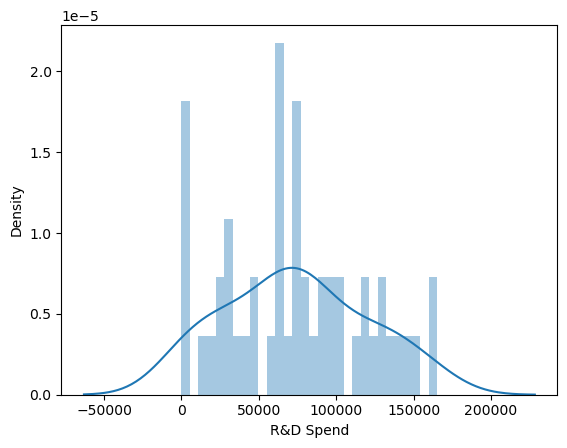

In [38]:
#distribution of profit
sns.distplot(dataset_50["R&D Spend"], bins=30)
plt.show()

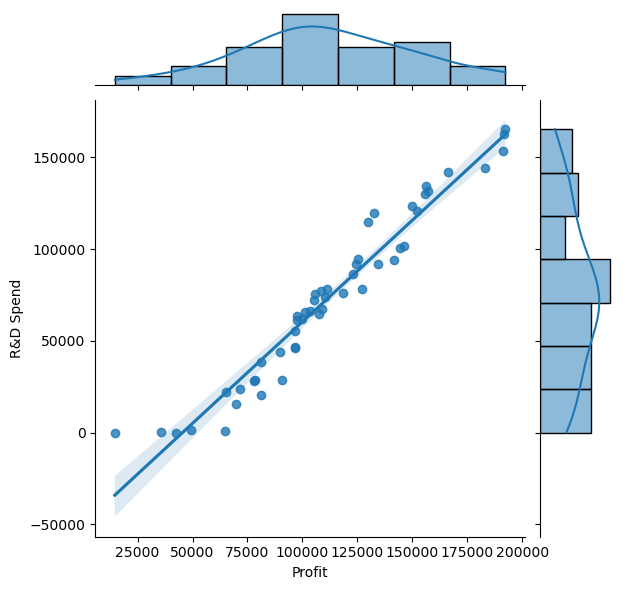

In [44]:
#R&D Spend vs. Profit Correlation
sns.jointplot(x=dataset_50["Profit"], y=dataset_50["R&D Spend"], kind="reg")
plt.show()

/Users/kulfi/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/Users/kulfi/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/Users/kulfi/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



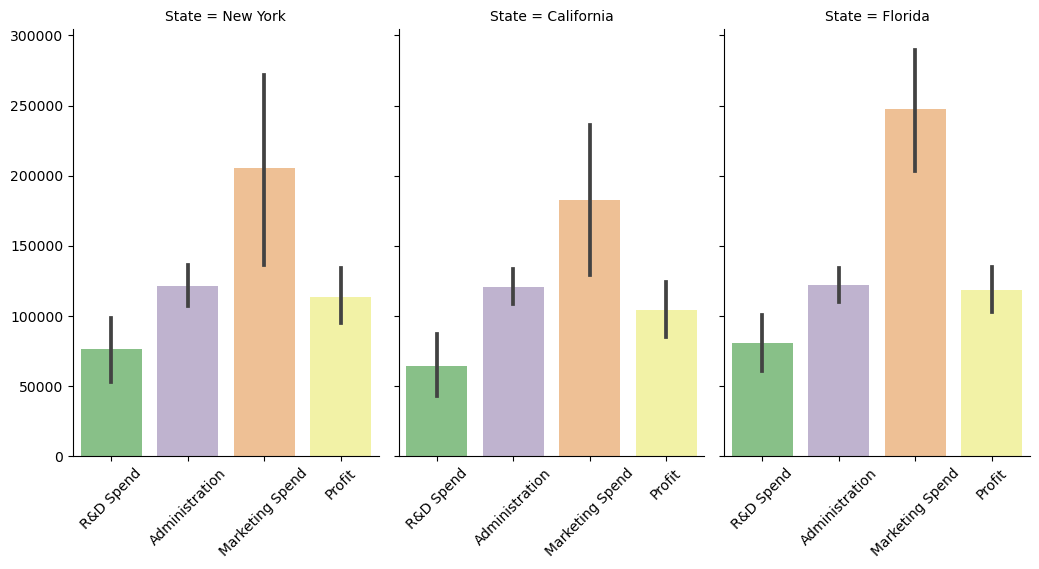

In [48]:
g=sns.FacetGrid(data=dataset_50, col="State", height=5, aspect=0.7)
g.map_dataframe(sns.barplot, palette="Accent")
g.set_xticklabels(rotation=45)
plt.show()

<h4>Insights</h4>
1. Profits in New York are generally higher compared to other states.<br>
2. Marketing Spend is highest in Florida, followed by New York and California.<br>
3. R&D Spend and Administration are relatively consistent across all states.

<h1>Data Preparation</h1>

In [69]:
#converting categorical columns to numerical
dummy_states = pd.get_dummies(dataset_50['State'], prefix='State')
dataset_50 = pd.concat([dataset_50, dummy_states], axis=1)
dataset_50 = dataset_50.drop('State', axis=1)
dataset_50.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


<h1>Model Creation and Training</h1>

In [102]:
#Data Split
X = dataset_50.drop(columns = "Profit")
y = dataset_50["Profit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

In [103]:
#Checking if the split has approximately equal distributions of values
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35, 6)
(15, 6)
(35,)
(15,)


<h3>a. Multiple Linear Regression</h3>

Mean Squared Error (MSE): 168289377.16
Root Mean Squared Error (RMSE): 12972.64
R-squared (R2) Score: 0.93
Mean Absolute Error (MAE): 8962.16


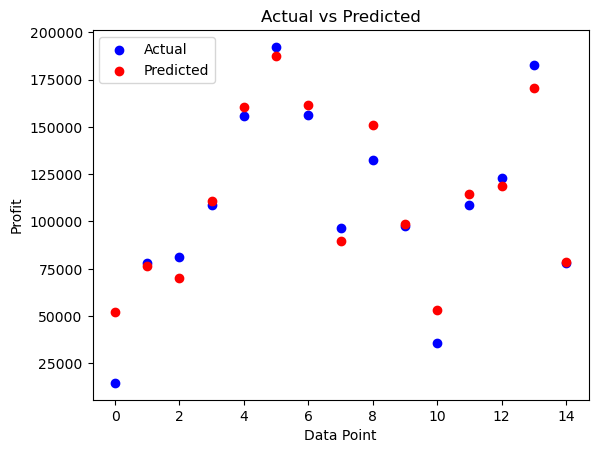

In [106]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
y_pred = linear_regression.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics with two decimal places
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R-squared (R2) Score:", round(r2, 2))
print("Mean Absolute Error (MAE):", round(mae, 2))

plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted')
plt.xlabel('Data Point')
plt.ylabel('Profit')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

Mean Squared Error (MSE): 277930490.7
Root Mean Squared Error (RMSE): 16671.25
R-squared (R2) Score: 0.88
Mean Absolute Error (MAE): 10998.96


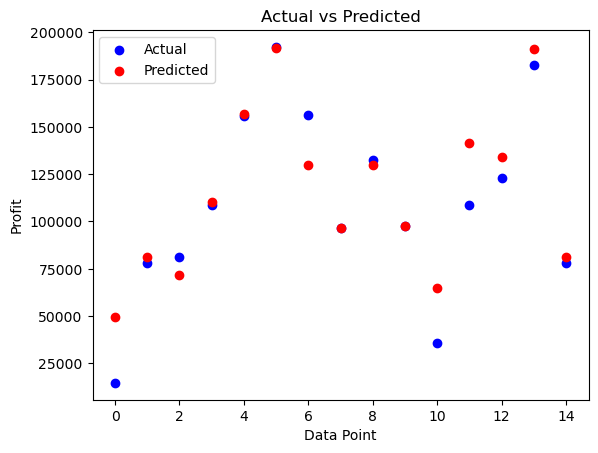

In [107]:
decision_tree_regression = DecisionTreeRegressor()
decision_tree_regression.fit(X_train,y_train)
y_pred = decision_tree_regression.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics with two decimal places
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R-squared (R2) Score:", round(r2, 2))
print("Mean Absolute Error (MAE):", round(mae, 2))

plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted')
plt.xlabel('Data Point')
plt.ylabel('Profit')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

Mean Squared Error (MSE): 233876969.85
Root Mean Squared Error (RMSE): 15293.04
R-squared (R2) Score: 0.9
Mean Absolute Error (MAE): 11346.14


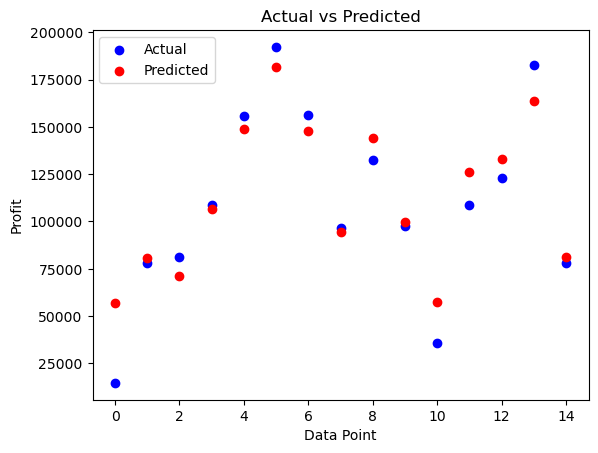

In [108]:
random_forest_regression = RandomForestRegressor()
random_forest_regression.fit(X_train,y_train)
y_pred = random_forest_regression.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics with two decimal places
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R-squared (R2) Score:", round(r2, 2))
print("Mean Absolute Error (MAE):", round(mae, 2))

plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted')
plt.xlabel('Data Point')
plt.ylabel('Profit')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

Based on the metrics, the Multiple Linear Regression model has the lowest MSE, RMSE, and MAE, indicating better performance compared to the other models. Additionally, it has the highest R-squared (R2) score, suggesting a better fit to the data.

Therefore, based on the provided metrics, the Multiple Linear Regression model appears to be the best among the three models for predicting the target variable.